# 1. Introduction

This challenge comes from [2023 Week 11 | Du Bois Challenge](https://workout-wednesday.com/crma_2023-w11/), which creates a static dashboard. In my implementation, I'll try to build the dashboard by using `Matplotlib` only. Without further ado, let's do it!

First import some necessary libraries:

In [1]:
# For data loading and manipulating
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt

In [2]:
DuBois_data = pd.read_csv("./datasets/Du_Bois_Challenge.csv", index_col=0)
DuBois_data

,Manufacturing,Commerce,Domestic,Professions,Agriculture
Group,,,,,
Both,3.60,2.50,20.00,0.50,38.0
Males,4.10,4.10,14.85,0.50,41.0
Females,2.05,0.25,33.80,0.25,28.2


In [3]:
bg_color = "#CCBCAD"
bar_colors = ["#008000", "#654321", "#FFD700", "#4782B4", "#DC143C"]

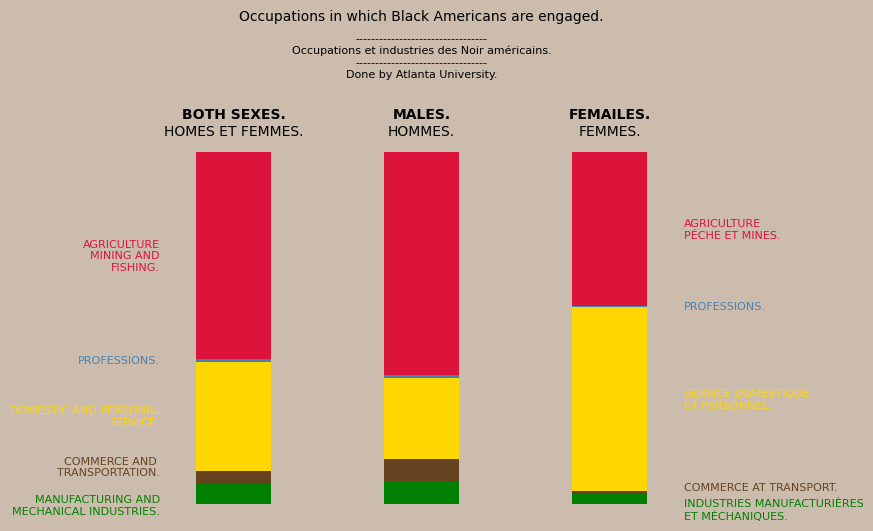

In [4]:
fig, ax = plt.subplots(facecolor=bg_color, subplot_kw=dict(facecolor=bg_color))

labels = {"Manufacturing": ["MANUFACTURING AND\nMECHANICAL INDUSTRIES.",  "INDUSTRIES MANUFACTURIÈRES\nET MÉCHANIQUES."],
          "Commerce": ["COMMERCE AND \nTRANSPORTATION.", "COMMERCE AT TRANSPORT."],
          "Domestic": ["DOMESTIC AND PERSONAL\nSERVICE.", "SERVICE DOMESTIQUE\nET PERSONNEL."],
          "Professions": ["PROFESSIONS.", "PROFESSIONS."],
          "Agriculture": ["AGRICULTURE\nMINING AND\nFISHING.", "AGRICULTURE\nPÉCHE ET MINES."]}
bottom = np.zeros(3)
bars = []
vas = ["top", "bottom", "center", "center", "center"]
for va, color, (label, content) in zip(vas, bar_colors, DuBois_data.items()):
    bar = ax.bar(content.index, content.values, width=0.4, bottom=bottom, color=color)    
    ax.annotate(labels[label][0], xy=(0, content.values[0]/2+bottom[0]), xytext=(-10, 0),
                xycoords=ax.get_yaxis_transform(), textcoords="offset points", ha="right", va=va,
                fontsize=8, color=color)
    ax.annotate(labels[label][1], xy=(1, content.values[-1]/2+bottom[-1]), xytext=(10, 0),
                xycoords=ax.get_yaxis_transform(), textcoords="offset points", ha="left", va=va,
                fontsize=8, color=color)
    bars.append(bar)
    bottom += content.values

default_fontsize = 10
ax.bar_label(bars[-1], labels=["BOTH SEXES.", "MALES.", "FEMAILES."], padding=default_fontsize*2.2, fontweight="bold")
ax.bar_label(bars[-1], labels=["HOMES ET FEMMES.", "HOMMES.", "FEMMES."], padding=default_fontsize, fontweight="ultralight")

offset = 80
ax.annotate("Occupations in which Black Americans are engaged.", xy=(0.5, 1), xytext=(0, offset), 
            xycoords="axes fraction", textcoords="offset points", ha="center", va="bottom")
ax.annotate("---------------------------------\nOccupations et industries des Noir américains.\n---------------------------------\nDone by Atlanta University.",
            xy=(0.5, 1), xytext=(0, offset-4*default_fontsize), fontsize=8,
            xycoords="axes fraction", textcoords="offset points", ha="center", va="bottom")

ax.spines[:].set_visible(False)
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

# fig.savefig("crma_2023-w11.jpg", bbox_inches="tight", dpi=300)